In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import json
from pathlib import Path

In [2]:
import os
import sys

# Appends the entire brainstation_capstone project folder to the path.
# This allows us to make a relative import of our scripts in brainstation_capstone/scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from scripts import utils

# **Cleaning Lyrics**
Author: Justin Ng

This notebook contains all the steps for converting lyrics into various representations.

We first need to load the data and clean the lyrics.

## Loading the Data

In [4]:
# Set path for the raw data
DATA_PATH = utils.get_datapath()

In [5]:
# Load the lyrics.
lyrics_df = utils.json_loader(DATA_PATH / 'genius-expertise' / 'lyrics.jl')

In [6]:
display(lyrics_df.info())
display(lyrics_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37993 entries, 0 to 37992
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   song    37993 non-null  object
 1   lyrics  37993 non-null  object
dtypes: object(2)
memory usage: 593.8+ KB


None

(37993, 2)

In [7]:
# Load the song info.
song_info_df = utils.json_loader(DATA_PATH / 'genius-expertise'/ 'song_info.json')

In [8]:
display(song_info_df.info())
display(song_info_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223257 entries, 0 to 223256
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   url_name        223257 non-null  object 
 1   title           223257 non-null  object 
 2   primary_artist  223257 non-null  object 
 3   release_date    176884 non-null  object 
 4   pyongs          223256 non-null  float64
 5   contributors    223257 non-null  int64  
 6   has_bio         223257 non-null  bool   
 7   views           72065 non-null   float64
 8   tags            223257 non-null  object 
 9   annotations     0 non-null       float64
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 15.5+ MB


None

(223257, 10)

In [9]:
# Rename song column to merge on.
song_info_df.rename(
    {'url_name': 'song'},
    axis=1,
    inplace= True
)

# Merge the song views with the lyrics. 
raw_combined_df = pd.merge(
    lyrics_df, 
    song_info_df[['song', 'views']].dropna(axis=0),
    on='song',

)

In [10]:
# Raw uncleaned df.
display(raw_combined_df.head(10))
display(raw_combined_df.shape)
display(raw_combined_df.info())

,song,lyrics,views
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...,5589280.0
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...,4592003.0
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b...",4651514.0
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock...",7378309.0
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo...",5113687.0
5,Kendrick-lamar-poetic-justice-lyrics,\n\n[Produced by Scoop DeVille & Sounwave]\n\n...,4137688.0
6,Kendrick-lamar-bitch-dont-kill-my-vibe-lyrics,\n\n[Produced by Sounwave]\n\n[Chorus]\nI am a...,4455762.0
7,Kendrick-lamar-king-kunta-lyrics,\n\n[Produced by Sounwave; Additional producti...,3976102.0
8,Kendrick-lamar-element-lyrics,\n\n[Intro: Kid Capri & Kendrick Lamar]\nNew K...,2506800.0
9,Kendrick-lamar-the-blacker-the-berry-lyrics,\n\n[Produced by Boi-1da & Koz]\n\n[Intro: Ken...,2557473.0


(37905, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37905 entries, 0 to 37904
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   song    37905 non-null  object 
 1   lyrics  37905 non-null  object 
 2   views   37905 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


None

## Cleaning the Lyrics

In [11]:
raw_combined_df['cleaned_lyrics'] = raw_combined_df['lyrics'].apply(utils.clean_lyrics)

In [12]:
display(raw_combined_df.head()),
raw_combined_df.shape

,song,lyrics,views,cleaned_lyrics
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...,5589280.0,pour up drank head shot drank sit down drank ...
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...,4592003.0,uh me and my niggas tryna get it ya bish ya b...
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b...",4651514.0,america god bless you if its good to you amer...
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock...",7378309.0,i love bad bitches thats my fuckin problem an...
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo...",5113687.0,i got i got i got i got loyalty got royalty i...


(37905, 4)

In [13]:
raw_combined_df.to_csv(DATA_PATH / 'clean_lyrics.csv')

# Exploring Views and Splitting Views

We will split the views based on how the distribution of the views look like. 

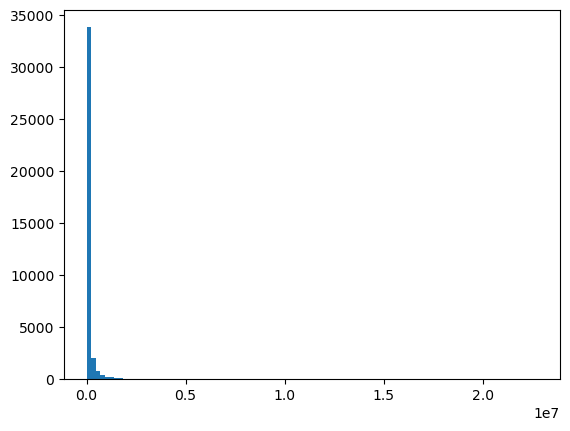

In [20]:
plt.hist(raw_combined_df['views'], bins=100);

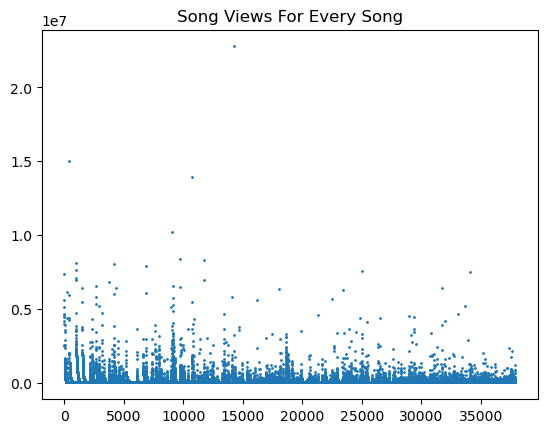

In [29]:
plt.figure()
plt.scatter(x=raw_combined_df.index, y=raw_combined_df['views'], s=1)
plt.title('Song views for every song'.title())
plt.show()

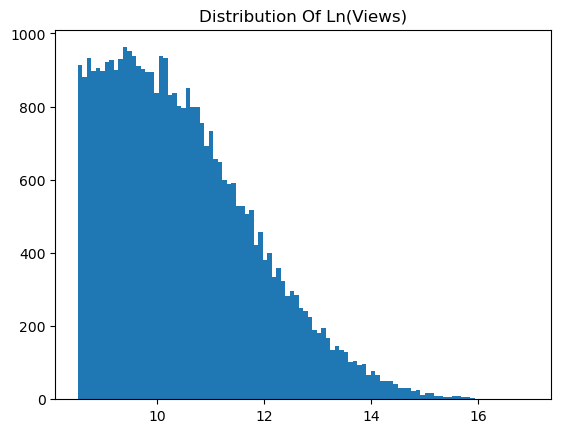

In [34]:
plt.figure()
plt.hist(np.log(raw_combined_df['views']), bins=100)
plt.title('Distribution of ln(views)'.title())
plt.show()

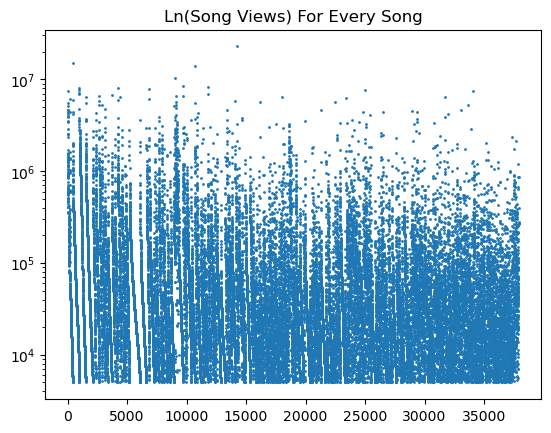

In [32]:
plt.figure()
plt.scatter(x=raw_combined_df.index, y=raw_combined_df['views'], s=1)
plt.title('ln(Song views) for every song'.title())
plt.yscale('log')
plt.show()